In [63]:
#Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Import sklearn models to predict outcomes
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import recall_score, precision_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns


pd.set_option('display.max_columns', 100)

In [2]:
train = pd.read_csv('exoTrain.csv')
test = pd.read_csv('exoTest.csv')

In [58]:
train[train['LABEL'] == 2]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,FLUX.41,FLUX.42,FLUX.43,FLUX.44,FLUX.45,FLUX.46,FLUX.47,FLUX.48,FLUX.49,...,FLUX.3148,FLUX.3149,FLUX.3150,FLUX.3151,FLUX.3152,FLUX.3153,FLUX.3154,FLUX.3155,FLUX.3156,FLUX.3157,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,-195.99,-208.31,-103.22,-193.85,-187.64,-92.25,-119.25,-87.50,-1.86,-4.99,...,101.27,2.15,-6.04,-58.44,-29.64,-90.71,-90.71,-265.25,-367.84,-317.51,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,-24.68,-27.62,-31.21,-32.31,-37.52,-46.58,-46.20,-35.79,-42.09,-51.25,...,18.75,5.10,17.57,-16.46,21.43,-32.67,-32.67,-58.56,-51.99,-32.14,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,224.02,237.69,251.53,236.06,212.31,220.95,249.08,234.14,259.02,280.05,...,-33.38,-45.09,-50.22,-97.19,-64.22,-123.17,-123.17,-144.86,-106.97,-56.38,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,70.31,63.67,75.00,70.73,70.29,95.44,100.57,114.93,103.45,107.80,...,-16.04,-18.86,-11.27,-19.92,-1.99,-13.49,-13.49,-27.74,-30.46,-32.40,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,-964.35,-956.60,-911.57,-885.15,-859.38,-806.1

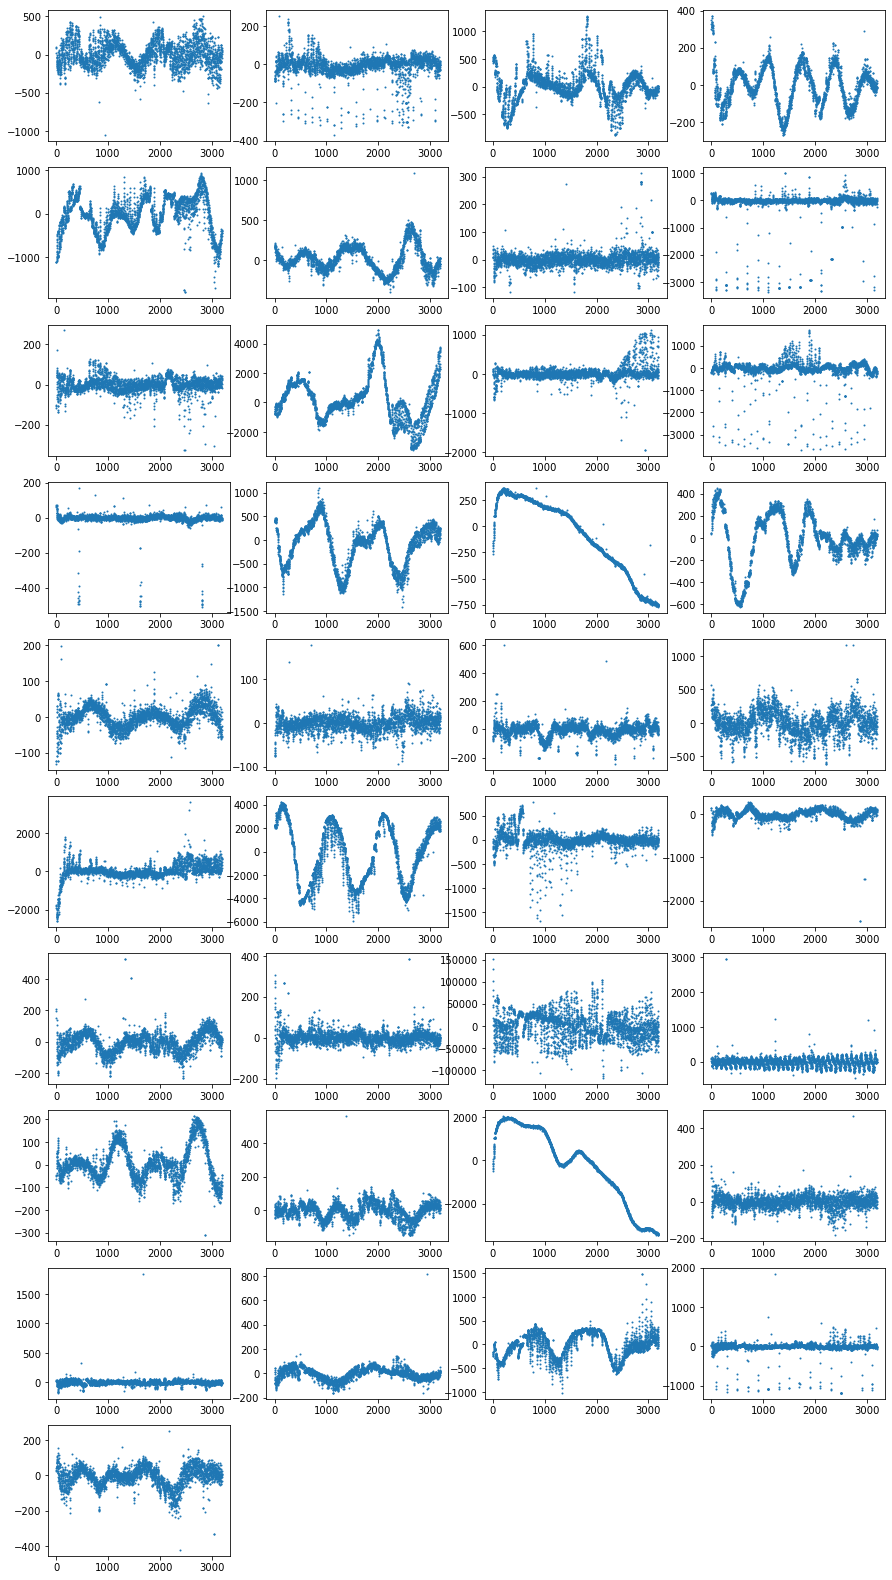

In [67]:
fig = plt.figure(figsize=(15,40))
for i in range(37):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL'] == 2].iloc[i,1:],s=1)

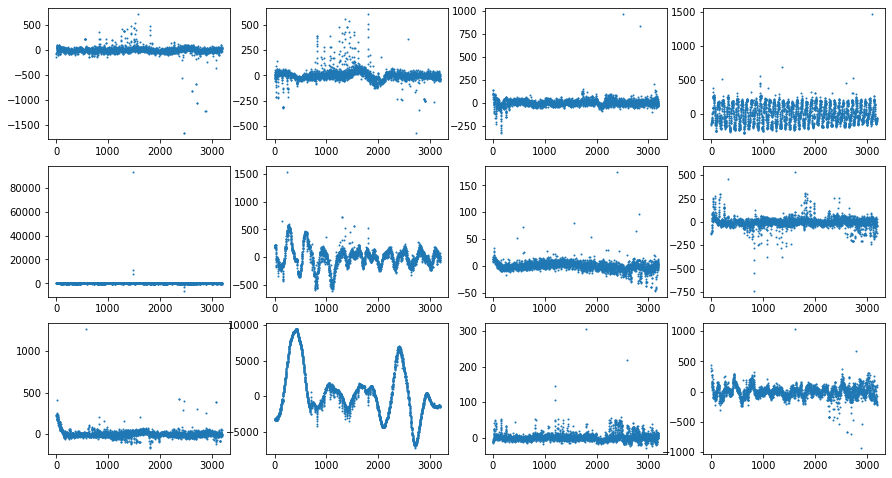

In [5]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL'] == 1].iloc[i,1:],s=1)

In [45]:
train.LABEL.value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [7]:
test.LABEL.value_counts()

1    565
2      5
Name: LABEL, dtype: int64

In [8]:
train.groupby(['LABEL']).count()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,FLUX.41,FLUX.42,FLUX.43,FLUX.44,FLUX.45,FLUX.46,FLUX.47,FLUX.48,FLUX.49,FLUX.50,...,FLUX.3148,FLUX.3149,FLUX.3150,FLUX.3151,FLUX.3152,FLUX.3153,FLUX.3154,FLUX.3155,FLUX.3156,FLUX.3157,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
LABEL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,...,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050
2,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37


<ipython-input-54-ce54cf6599f5>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  flux = train.groupby(['LABEL'])['FLUX.3188', 'FLUX.1'].count()


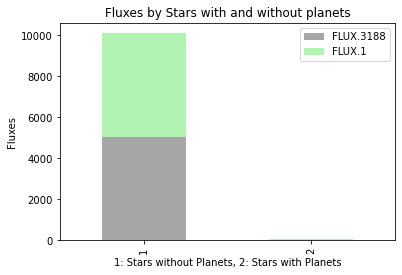

In [54]:
#for i in range(train.FLUX[i], 3197):
#    flux = train.groupby(['LABEL', 'FLUX.'[i]]).count().unstack()

# Stack of fluxes 
flux = train.groupby(['LABEL'])['FLUX.3188', 'FLUX.1'].count()
p1 = flux.plot(kind = 'bar', stacked = True, 
                   title = 'Fluxes by Stars with and without planets', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('1: Stars without Planets, 2: Stars with Planets')
p1.set_ylabel('Fluxes')
p1.legend(['FLUX.3188','FLUX.1'])
plt.show();

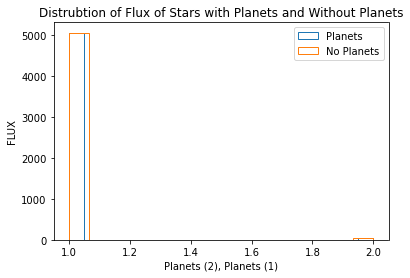

In [53]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(train['LABEL'], label="Planets", bins=20, histtype='step')
# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(train['LABEL'], label="No Planets", bins=15, histtype='step')
# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Planets (2), Planets (1)')
# Set the y-axis label to "# of observations"
ax.set_ylabel('FLUX')
ax.set_title('Distrubtion of Flux of Stars with Planets and Without Planets')
ax.legend()
plt.show()

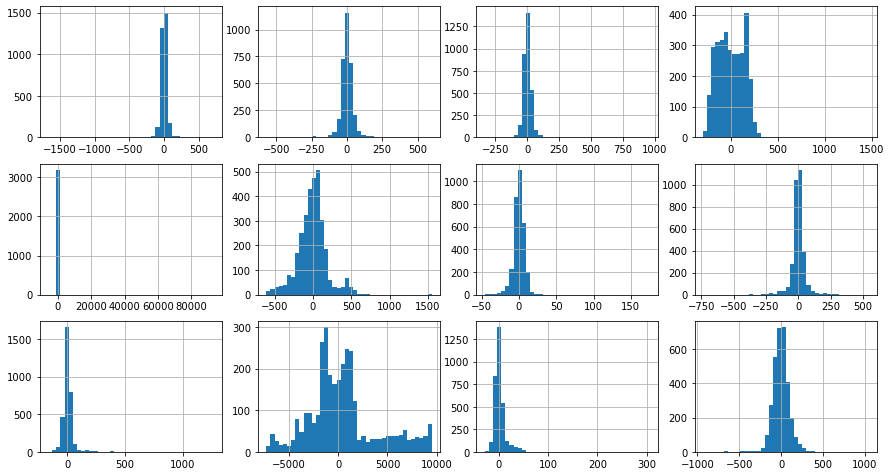

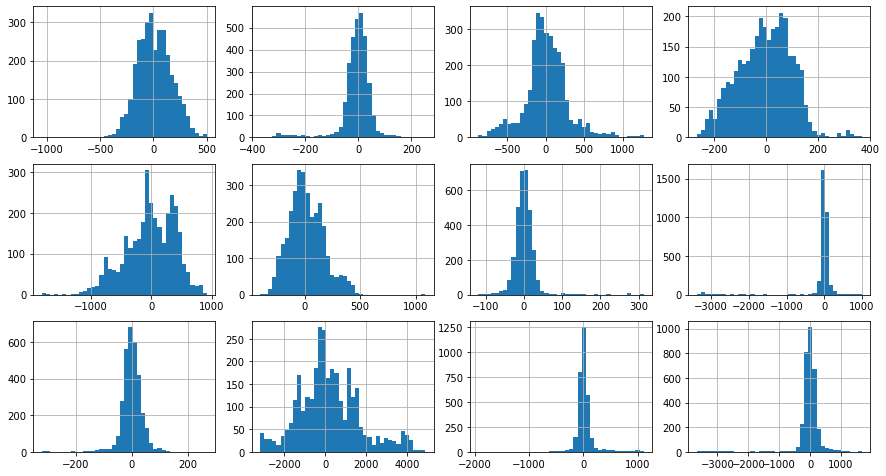

In [11]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    train[train['LABEL']==1].iloc[i,1:].hist(bins=40)

fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    train[train['LABEL']==2].iloc[i,1:].hist(bins=40)

In [12]:
X_tr = train.drop('LABEL', axis=1)
y_tr = train.LABEL 
X_tt = test.drop('LABEL', axis=1)
y_tt = test.LABEL

# Using Logistic regression to make predictions for present of a planet

In [13]:
logreg = LogisticRegression().fit(X_tr, y_tr)
logreg_pred = logreg.predict(X_tt)
acc_log = accuracy_score(y_tt, logreg_pred)
print(round(acc_log, 2)* 100)

56.00000000000001


/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
cf_matrix = confusion_matrix(y_tt, logreg_pred)
print(cf_matrix)

[[316 249]
 [  3   2]]


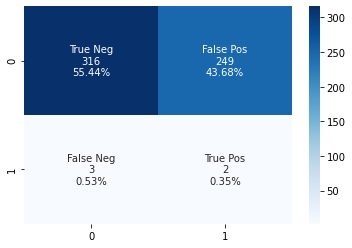

In [15]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

# KNN model

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, p = 1)
# Using a Manhattan distance

In [17]:
knn_m = knn.fit(X_tr, y_tr)
knn_m_p = knn.predict(X_tt)
knn_score = accuracy_score(y_tt, knn_m_p)
knn_score

0.9912280701754386

In [18]:
cf_matrix_knn = confusion_matrix(y_tt, knn_m_p)
print(cf_matrix_knn)

[[565   0]
 [  5   0]]


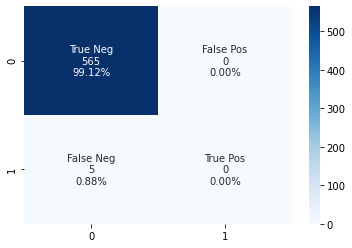

In [19]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_knn.flatten()/np.sum(cf_matrix_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_knn, annot=labels, fmt='', cmap='Blues');

In [20]:
knn_e = KNeighborsClassifier(n_neighbors=5, p = 2)
# Using Euclidean distance 

In [21]:
knn_e = knn_e.fit(X_tr, y_tr)
knn_e_p = knn_e.predict(X_tt)
knn_e_score = accuracy_score(y_tt, knn_e_p)
knn_e_score

0.9912280701754386

In [22]:
cf_matrix_knn_e = confusion_matrix(y_tt, knn_e_p)
print(cf_matrix_knn_e)

[[565   0]
 [  5   0]]


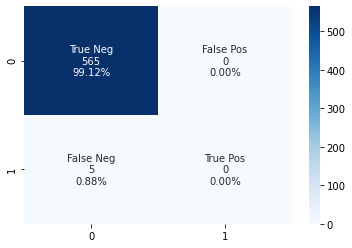

In [23]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_knn_e.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_knn_e.flatten()/np.sum(cf_matrix_knn_e)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_knn_e, annot=labels, fmt='', cmap='Blues');

In [24]:
#Using Minoski Distance 
knn_mi = KNeighborsClassifier(n_neighbors=2, p = 3)

In [25]:
knn_mi = knn_mi.fit(X_tr, y_tr)
knn_mi_p = knn_mi.predict(X_tt)
knn_mi_score = accuracy_score(y_tt, knn_e_p)
knn_mi_score

0.9912280701754386

In [26]:
cf_matrix_knn_mi = confusion_matrix(y_tt, knn_mi_p)
print(cf_matrix_knn_mi)

[[565   0]
 [  5   0]]


In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_knn_mi.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_knn_mi.flatten()/np.sum(cf_matrix_knn_mi)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_knn_mi, annot=labels, fmt='', cmap='Blues');

# Decision Tree

In [37]:
classifier = DecisionTreeClassifier(random_state=13)  
dt = classifier.fit(X_tr, y_tr) 

In [38]:
dt_pred = dt.predict(X_tt)  
dt_score = accuracy_score(y_tt, dt_pred)
dt_score

0.980701754385965

In [39]:
cf_matrix_dt = confusion_matrix(y_tt, dt_pred)
print(cf_matrix_dt)

[[558   7]
 [  4   1]]


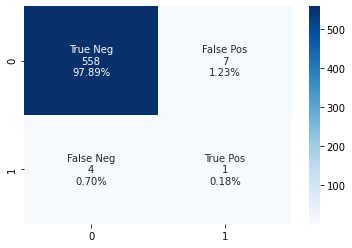

In [40]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_dt.flatten()/np.sum(cf_matrix_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_dt, annot=labels, fmt='', cmap='Blues');

# Using SMOTE to create syntheic classes for 2: exoplanets present due to the inbalance of classes

In [46]:
sm = SMOTE(sampling_strategy= 0.5 , random_state = 13)
SM_X_tr, SM_y_tr = sm.fit_sample(X_tr, y_tr)

In [29]:
logreg = LogisticRegression().fit(SM_X_tr, SM_y_tr)
logreg_pred_sm = logreg.predict(X_tt)
acc_log_sm = accuracy_score(y_tt, logreg_pred_sm)
acc_log_sm

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.543859649122807

[[307 258]
 [  2   3]]


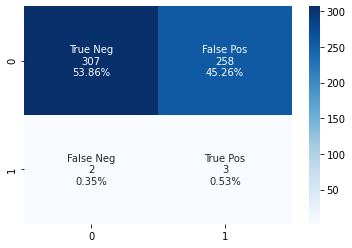

In [30]:
cf_matrix_log_sm = confusion_matrix(y_tt, logreg_pred_sm)
print(cf_matrix_log_sm)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_log_sm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_log_sm.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_log_sm, annot=labels, fmt='', cmap='Blues');

In [31]:
knn_sm = KNeighborsClassifier(n_neighbors=5, p = 2)
# Using Euclidean distance

In [32]:
knn_e_sm = knn_e.fit(SM_X_tr, SM_y_tr)
knn_e_sm_p = knn_e_sm.predict(X_tt)
knn_e_sm_score = accuracy_score(y_tt, knn_e_sm_p)
knn_e_sm_score

0.980701754385965

[[558   7]
 [  4   1]]


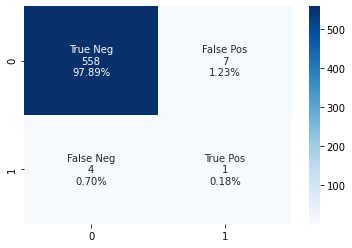

In [35]:
cf_matrix_knn_sm = confusion_matrix(y_tt, knn_e_sm_p)
print(cf_matrix_knn_sm)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_knn_sm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_knn_sm.flatten()/np.sum(cf_matrix_knn_sm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_knn_sm, annot=labels, fmt='', cmap='Blues');

In [48]:
dt_sm = classifier.fit(SM_X_tr, SM_y_tr) 

In [49]:
dt_sm_pred = dt_sm.predict(X_tt)  
dt_score = accuracy_score(y_tt, dt_sm_pred)
dt_score

0.9719298245614035

In [50]:
SM_y_tr.value_counts()

1    5050
2    2525
Name: LABEL, dtype: int64

[[554  11]
 [  5   0]]


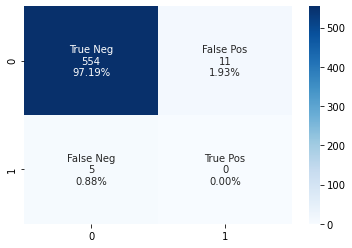

In [51]:
cf_matrix_dt_sm = confusion_matrix(y_tt, dt_sm_pred)
print(cf_matrix_dt_sm)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_dt_sm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_dt_sm.flatten()/np.sum(cf_matrix_dt_sm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_dt_sm, annot=labels, fmt='', cmap='Blues');

In [66]:
print ("\nClassification report :\n",(classification_report(y_tt, knn_e_sm_p)))
print ("\nClassification report :\n",(classification_report(y_tt, logreg_pred_sm)))
print ("\nClassification report :\n",(classification_report(y_tt, dt_sm_pred)))


Classification report :
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       565
           2       0.12      0.20      0.15         5

    accuracy                           0.98       570
   macro avg       0.56      0.59      0.57       570
weighted avg       0.99      0.98      0.98       570


Classification report :
               precision    recall  f1-score   support

           1       0.99      0.54      0.70       565
           2       0.01      0.60      0.02         5

    accuracy                           0.54       570
   macro avg       0.50      0.57      0.36       570
weighted avg       0.98      0.54      0.70       570


Classification report :
               precision    recall  f1-score   support

           1       0.99      0.98      0.99       565
           2       0.00      0.00      0.00         5

    accuracy                           0.97       570
   macro avg       0.50      0.49      0.49       